# 실험 결과 정리

- [실험일지](https://docs.google.com/spreadsheets/d/1fKwSJLHQvgaVKsSUfbOMTR2tt1Wv10p1c6cEFLHj5QY/edit?usp=sharing)
- **실험 결과**
1. 단어장 개수 변경에 따른 모델별 성능 확인하기
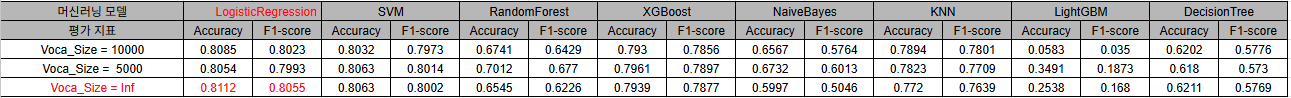

2. 딥러닝 모델 성능 확인하기
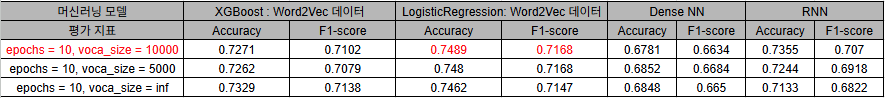

3. (추가) 딥러닝 모델 성능 실험

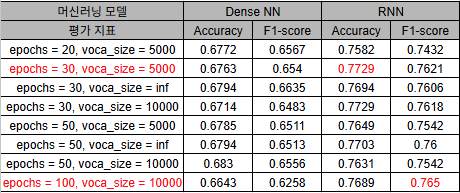


## ✅ 실험 1. 단어장 크기(Voca Size) 변경에 따른 머신러닝 모델 성능 비교

| Voca Size | 최고 Accuracy | 최고 F1-score | 모델 |
|-----------|----------------|----------------|-------|
| 10,000    | 0.8085         | 0.8023         | LogisticRegression |
| 5,000     | 0.8054         | 0.7993        | SVM |
| ∞         | **0.8112**     | **0.8055**     | LogisticRegression |

**🔎 분석 요약**
- `LogisticRegression`이 전반적으로 가장 우수한 성능을 보임.
- Voca Size가 클수록 모델 성능이 약간 상승하는 경향을 보임.
- `RandomForest`, `LightGBM` 등의 트리 기반 모델은 상대적으로 성능이 낮음.
- `LightGBM`은 거의 사용 불가능할 수준의 낮은 성능을 기록.

---

## ✅ 실험 2. Word2Vec 평균 벡터 기반 딥러닝 vs 머신러닝 성능 비교 (Epochs = 10)

| 모델 | 최고 Accuracy | 최고 F1-score | 조건 |
|-------|----------------|----------------|--------|
| LogisticRegression | **0.7489** | **0.7168** | voca_size=10000 |
| XGBoost | 0.7329 | 0.7138 | voca_size=∞ |
| RNN | 0.7355 | 0.7070 | voca_size=10000 |
| Dense NN | 0.6852 | 0.6684 | voca_size=5000 |

**🔎 분석 요약**
- Word2Vec 벡터 평균 기반 `LogisticRegression`이 딥러닝 모델보다 더 높은 성능을 기록.
- `RNN`은 의미 있는 성능을 보이며, 학습이 더 진행되면 향상 가능성이 있음.
- `Dense NN`은 성능이 가장 낮아 문장 구조를 충분히 반영하지 못함.

---

## ✅ 실험 3. 딥러닝 모델 성능 추가 실험 (Epochs 증가)

| 모델 | 최고 Accuracy | 최고 F1-score | 조건 |
|-------|----------------|----------------|--------|
| RNN | **0.7729** | **0.7621** | epochs=100, voca_size=10000 |
| Dense NN | 0.6830 | 0.6556 | epochs=50, voca_size=10000 |

**🔎 분석 요약**
- `RNN`은 학습량(epochs)을 늘릴수록 성능이 향상됨.
- epochs=100, voca_size=10000일 때 RNN이 최고의 F1-score를 기록.
- `Dense NN`은 에폭을 늘려도 성능이 크게 개선되지 않음.

---

## 🔚 종합 결론

- **기계학습 모델 중에서는 LogisticRegression이 가장 우수**하며, 특히 Voca Size가 무한일 때 가장 좋은 성능을 보임.
- **RNN은 충분한 학습(epoch↑)을 통해 LogisticRegression 성능에 근접하거나 초과 가능**.
- **Dense NN은 문장 특성 반영에 한계**가 있어 복잡한 언어 표현을 다루는 데 적합하지 않음.

# 실험 결과 회고
- 잘한점 : 실험 계획과 코드 구조를 수립한 뒤 반복에 들이는 시간을 최소화 하려고 노력함
- 아쉬운 점 : 딥러닝이 머신 모델 보다 예측 성능이 낮게 나온 점을 이해하고 싶음
- 개선할 점 : 테스트에 들일 수 있는 시간은 한정적이므로 선택과 집중이 필요함을 다시 깨달음.


# 데이터셋 만들기

In [ ]:
!pip install gensim

# 라이브러리 불러오기

In [2]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비

## index -> text : 단어장 갯수 지정

In [ ]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

#(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
#(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


## DTM , TF-idf 학습데이터 준비
 - 변수명 : x_train_tfidf, x_test_tfidf

In [ ]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [ ]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

## W2V 학습데이터 준비
 - 변수명 : x_train_w2v, x_test_w2v

In [ ]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [ ]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('glenn', 0.8317967057228088), ('label', 0.8237256407737732), ('gordon', 0.8228896856307983), ('attorney', 0.8179718852043152), ('acting', 0.8161475658416748), ('indiana', 0.8142090439796448), ('farms', 0.8132758736610413), ('communication', 0.8098393082618713), ('roberts', 0.8083871006965637), ('media', 0.8081335425376892)]


In [ ]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])




In [ ]:
x_train_w2v.shape

(8982, 100, 256)

In [ ]:
x_test_w2v.shape

(2246, 100, 256)

# 모델 정의 및 실험

## 1. 머신러닝 모델 실험

### 1-1. LogisticsRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# LogisticsRegression 학습
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

#예측
predicted = lr.predict(x_test_tfidf)

#평가지표
acc = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.8112
✅ F1-score : 0.8055


### 1-2. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# SVM 학습
svm = SVC(C=1000, kernel='linear')  # 텍스트 분류에서는 보통 linear kernel 사용
svm.fit(x_train_tfidf, y_train)

# 예측
svm_predicted = svm.predict(x_test_tfidf)

# 평가지표
svm_acc = accuracy_score(y_test, svm_predicted)
svm_f1 = f1_score(y_test, svm_predicted, average='weighted')

print(f"✅ SVM Accuracy : {svm_acc:.4f}")
print(f"✅ SVM F1-score : {svm_f1:.4f}")


✅ SVM Accuracy : 0.8063
✅ SVM F1-score : 0.8002


### 1-3. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest 학습
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)


RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
#예측
predicted = forest.predict(x_test_tfidf)

#평가지표
acc = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.6545
✅ F1-score : 0.6226


### 1-4. XGBoost

In [ ]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

# 예측
predicted = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7939
✅ F1-score : 0.7877


### 1-5. NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# 모델 학습
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# 예측
nb_pred = nb.predict(x_test_tfidf)

# 평가지표
nb_acc = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

print(f"✅ Naive Bayes Accuracy : {nb_acc:.4f}")
print(f"✅ Naive Bayes F1-score : {nb_f1:.4f}")


✅ Naive Bayes Accuracy : 0.5997
✅ Naive Bayes F1-score : 0.5046


### 1-6. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)  # 기본값은 5
knn.fit(x_train_tfidf, y_train)

# 예측
knn_pred = knn.predict(x_test_tfidf)

# 평가지표
knn_acc = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print(f"✅ KNN Accuracy : {knn_acc:.4f}")
print(f"✅ KNN F1-score : {knn_f1:.4f}")


✅ KNN Accuracy : 0.7720
✅ KNN F1-score : 0.7639


### 1-7. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# 모델 학습
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(x_train_tfidf, y_train)

# 예측
lgbm_pred = lgbm.predict(x_test_tfidf)

# 평가지표
lgbm_acc = accuracy_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred, average='weighted')

print(f"✅ LightGBM Accuracy : {lgbm_acc:.4f}")
print(f"✅ LightGBM F1-score : {lgbm_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.691827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163329
[LightGBM] [Info] Number of data points in the train set: 8982, number of used features: 3971
[LightGBM] [Info] Start training from score -5.095645
[LightGBM] [Info] Start training from score -3.034552
[LightGBM] [Info] Start training from score -4.798913
[LightGBM] [Info] Start training from score -1.044967
[LightGBM] [Info] Start training from score -1.527906
[LightGBM] [Info] Start training from score -6.269765
[LightGBM] [Info] Start training from score -5.231777
[LightGBM] [Info] Start training from score -6.330389
[LightGBM] [Info] Start training from score -4.168504
[LightGBM] [Info] Start training from score -4.487857
[LightGBM] [Info] Start training from score -4.282696
[LightGBM] [Info] Start training from score -3.136

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ LightGBM Accuracy : 0.2538
✅ LightGBM F1-score : 0.1680


### 1-8. DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 학습
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)

#예측
predicted = tree.predict(x_test_tfidf)

#평가지표
acc = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.6211
✅ F1-score : 0.5769


## 2. 딥러닝 모델 실험

### 2-0. 머신러닝 모델 : XGBoost 학습

#### 2-0-1. TF-IDF 로 XGBoost 모델 학습

In [ ]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7939
✅ F1-score : 0.7877


## 데이터 준비 - 실험2 부분만 한번에 실행하기 위해 추가함

### index -> text : 단어장 갯수 지정

In [41]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
#(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
#(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [42]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [43]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [44]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [45]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


### DTM , TF-idf 학습데이터 준비
 - 변수명 : x_train_tfidf, x_test_tfidf

In [46]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [47]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial eligibility standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed evaluating <unk> credit using a variety of financial ratios instead of relying solely on <unk> ability senate agriculture committee chairman patrick leahy d vt <unk> the proposed eligibility changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last re

### W2V 학습데이터 준비
 - 변수명 : x_train_w2v, x_test_w2v

In [48]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [49]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('aegean', 0.8249804973602295), ('geneva', 0.814933180809021), ('lim', 0.8086233139038086), ('iowa', 0.8080114126205444), ('erbynn', 0.8078818917274475), ('olivetti', 0.8070758581161499), ('craig', 0.8055728077888489), ('hall', 0.8037893176078796), ('okla', 0.799339234828949), ('alliance', 0.7972837686538696)]


In [50]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])




In [51]:
x_train_w2v.shape

(8982, 100, 256)

In [52]:
x_test_w2v.shape

(2246, 100, 256)

#### 2-0-2. Word2Vec 데이터로 XGBoost 모델 학습

In [53]:
# 데이터를 단어단위에서 문장단위로 바꿔줘야합니다.. ML은 2차원데이터만 받을수있기때문
# 문장에 대해서 토큰들의 벡터를 평균을 취해줍니다.

# Word2Vec 임베딩 시퀀스: (8982, 100, 256)
x_w2v_seq_train = x_train_w2v
x_w2v_seq_test = x_test_w2v
# 평균 풀링 → (8982, 256)
x_w2v_avg_train = np.mean(x_w2v_seq_train, axis=1)
x_w2v_avg_test = np.mean(x_w2v_seq_test, axis=1)
print(x_w2v_avg_train.shape)  # (8982, 256)

(8982, 256)


In [54]:
# Word2Vec 데이터로 XGBoost 모델 학습하기
from xgboost import XGBClassifier


# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_w2v_avg_train, y_train)

In [55]:
# 예측
y_pred = xgb_model.predict(x_w2v_avg_test)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

#### 2-0-3. Word2Vec 데이터로 LogisticsRegression 모델 학습하기 (최고성능)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Logistic Regression 모델 정의 및 학습
lr_model = LogisticRegression(C=1.0, penalty='l2', max_iter=1000, random_state=42)
lr_model.fit(x_w2v_avg_train, y_train)

# 예측
y_pred = lr_model.predict(x_w2v_avg_test)

# 평가
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

### 2-1. Dense NN 딥러닝 모델
- epoch = 10
  - ✅ Accuracy: 0.6781
  - ✅ F1-score: 0.6634

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요!
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,179,310 (50.28 MB)

 Trainable params: 13,179,310 (50.28 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# 시간이 좀 걸립니다! 한 20분정도..
#dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)
#dense_model.fit(x_train_w2v, y_train, epochs=20, batch_size=32, validation_split=0.2)
dense_model.fit(x_train_w2v, y_train, epochs=30, batch_size=32, validation_split=0.2)
#dense_model.fit(x_train_w2v, y_train, epochs=50, batch_size=32, validation_split=0.2)
#dense_model.fit(x_train_w2v, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5242 - loss: 2.2601 - val_accuracy: 0.6644 - val_loss: 1.4460
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6841 - loss: 1.3688 - val_accuracy: 0.6878 - val_loss: 1.3975
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7450 - loss: 1.0772 - val_accuracy: 0.6861 - val_loss: 1.3952
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7973 - loss: 0.8375 - val_accuracy: 0.7006 - val_loss: 1.4173
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8399 - loss: 0.6696 - val_accuracy: 0.6900 - val_loss: 1.5035
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8423 - loss: 0.6373 - val_accuracy: 0.6767 - val_loss: 1.5481
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8559 - loss: 0.5767 - val_accuracy: 0.6873 - val_loss: 1.6158
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8679 - loss: 0.5572 - val_accuracy: 0

In [59]:
y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
✅ Accuracy: 0.6714
✅ F1-score: 0.6483


### 2-2. RNN 딥러닝 모델
- epoch = 10
  - ✅ Accuracy: 0.7355
  - ✅ F1-score: 0.7070

In [60]:
# rnn 시계열 특징 데이터 특화 모델

rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요~
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,366 (813.93 KB)

 Trainable params: 208,366 (813.93 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 시간이 좀 걸립니다! 한 20분정도
#rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)
#rnn_model.fit(x_train_w2v, y_train, epochs=20, batch_size=32, validation_split=0.2)
rnn_model.fit(x_train_w2v, y_train, epochs=30, batch_size=32, validation_split=0.2)
#rnn_model.fit(x_train_w2v, y_train, epochs=50, batch_size=32, validation_split=0.2)
#rnn_model.fit(x_train_w2v, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3761 - loss: 2.6260 - val_accuracy: 0.5654 - val_loss: 1.8350
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5701 - loss: 1.7505 - val_accuracy: 0.6333 - val_loss: 1.4894
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6206 - loss: 1.5453 - val_accuracy: 0.6845 - val_loss: 1.3563
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6551 - loss: 1.4410 - val_accuracy: 0.6978 - val_loss: 1.2546
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6998 - loss: 1.2547 - val_accuracy: 0.7012 - val_loss: 1.2242
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7134 - loss: 1.2020 - val_accuracy: 0.7117 - val_loss: 1.2068
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7091 - loss: 1.1631 - val_accuracy: 0.7129 - val_loss: 1.1752
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7169 - loss: 1.1291 - val_accur

In [62]:

y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ Accuracy: 0.7729
✅ F1-score: 0.7618
